NAME: JOSHUA Byaruhanga REG. NO.: 2024/HD05/21925U  STUDENT NO.: 2400721925




Predicting if a client will subscribe to a Term Deposit

Business problem:

There has been a revenue decline for the Portuguese bank, and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold a better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have a higher chance to subscribe for a term deposit and focus marketing effort on such clients.

Data Wrangling 

The Data to be used to predict if a client will subscribe to A Term Deposit was obtained from https://archive.ics.uci.edu/dataset/222/bank+marketing

A classification approach is used to predict which clients are more likely to subscribe for term deposits.

In [24]:
# import required python libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [25]:
#Read data set 
df=pd.read_csv("bank-full.csv",delimiter=';',quotechar='"')


Printing the first 5 rows of the dataset


In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


What's the size of Dataset

In [27]:
df.shape

(45211, 17)

The dataset consist of 45211 rows and 17 columns

What are the different fields and respective Datatypes that constitute the Dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Age: This is age of client of Numeric type 

Job : This is client's title of categorical type 

Marital: This is marital status for the customer(Categorical) 

Education: This field shows the edcuation level for the client(Categorical) 

default: whether customer has deafaulted credit or not(Binary)

balance: customer average yearly balance(Numeric) 
housing: whether a customer has a housing loan or not (Binary)

loan: Whether customer has personal loan or not (Binary) 

contact: whether customer was contacted using cellular or telephone(categorical) 

day: Last day of the month (Numeric) 

Month: last contact month of year (categorical) 

duration: Last contact duration, in seconds (numeric) 

campaign: number of contacts performed during this campaign and for this client (numeric) 

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric) 

poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") 

y: has the client subscribed a term deposit? (binary: "yes","no")

find out duplication

In [29]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

Find out missing values in the dataset

In [30]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

EDA Exploratory Data Analysis

Univariate Analysis

Analysis of 'Subscribed' variable

In [32]:
#Frequency of 'subscribed'
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [33]:
df1=df

In [34]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Converting the target variables into 0s and 1s

In [35]:
df1['y'] = df1['y'].map({'yes': 1, 'no': 0})

In [36]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


<Axes: xlabel='y', ylabel='count'>

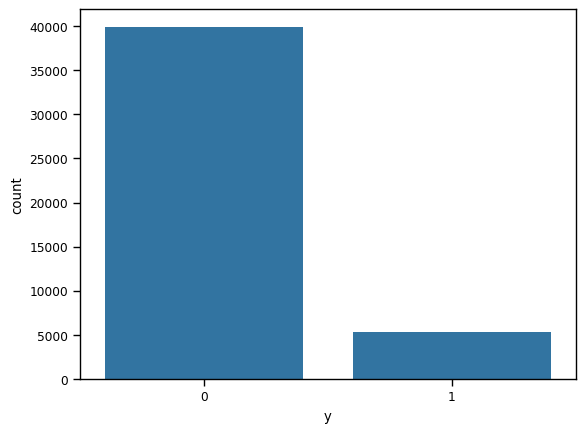

In [46]:
# Plotting the 'subscribed' frequency
sns.countplot(data=df1, x=df1['y'])

In [47]:
df1['y'].value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

From the above analysis we can see that roughly 12% subscribed to term deposit

Analysing th 'Job' variable

In [42]:
#Frequency table
df1['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

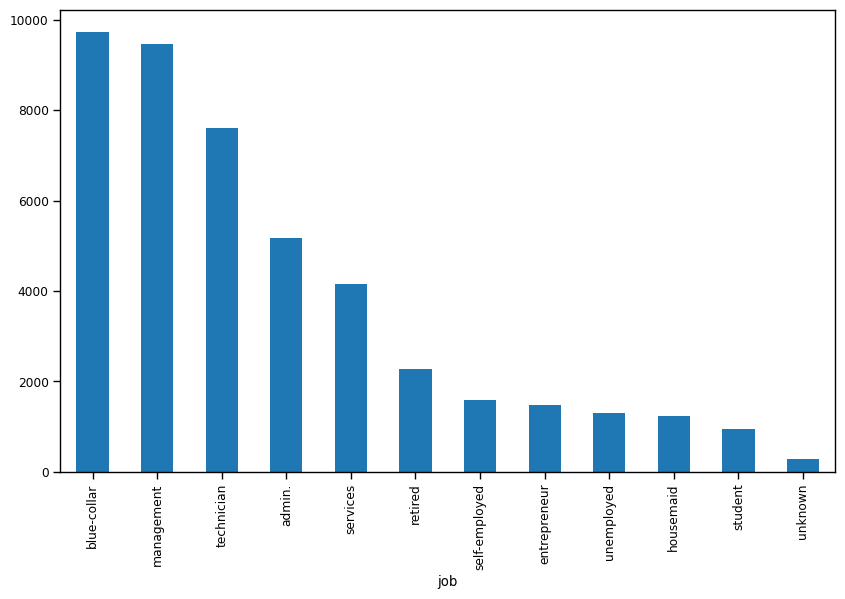

In [43]:
# Plotting the job frequency table
sns.set_context('paper')
df1['job'].value_counts().plot(kind='bar', figsize=(10,6));

Most of the clients belonged to blue-collar job and students are least in general as they don't make term deposits in general.

Analysis of 'marital' status

In [44]:
df1['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

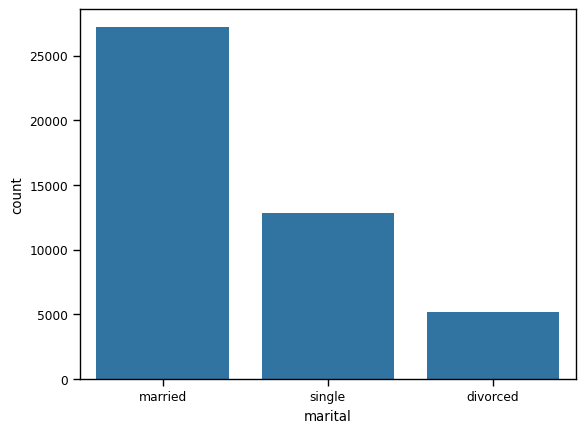

In [45]:
sns.countplot(data=df1, x='marital');

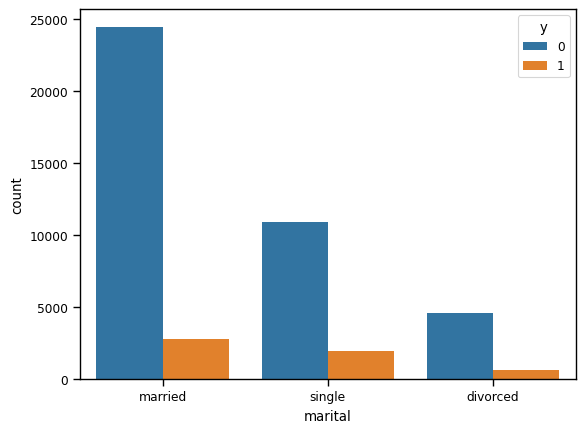

In [49]:
sns.countplot(data=df1, x='marital', hue='y');

from the above graph, married  subscribed more to term deposit, followed by single, lastly divorced

Analyzing the 'age' variable

/tmp/ipykernel_5136/1708864848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['age']);


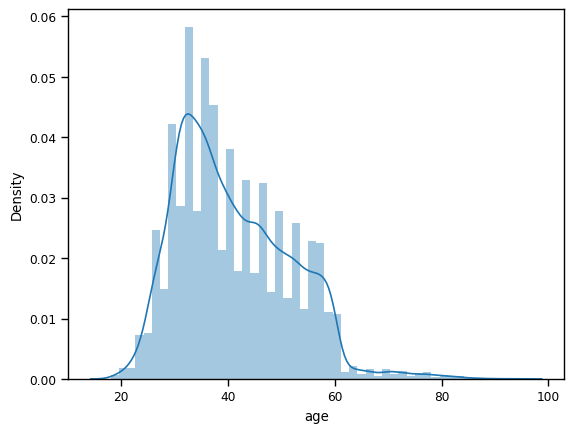

In [50]:
sns.distplot(df1['age']);

Most of the clients fall in the age group between 20-60.

Distribution of other categorical values 


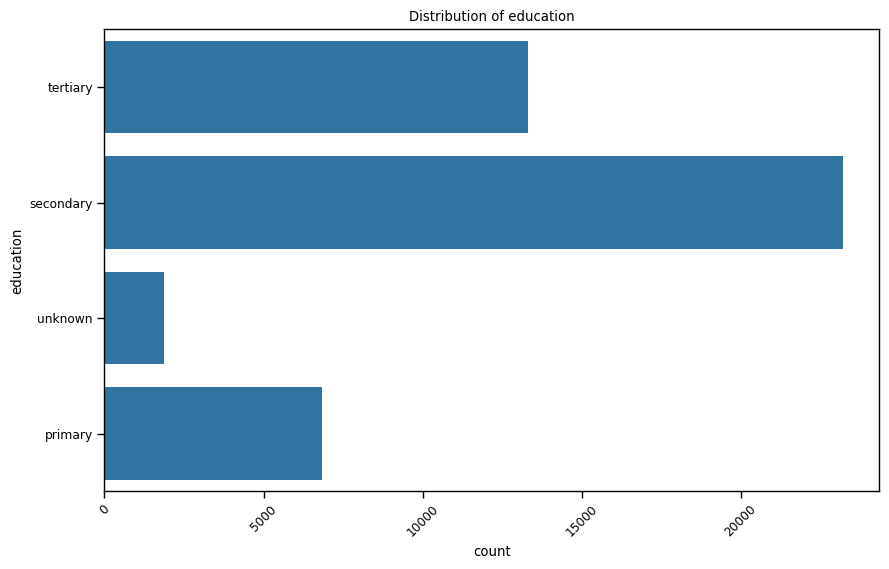

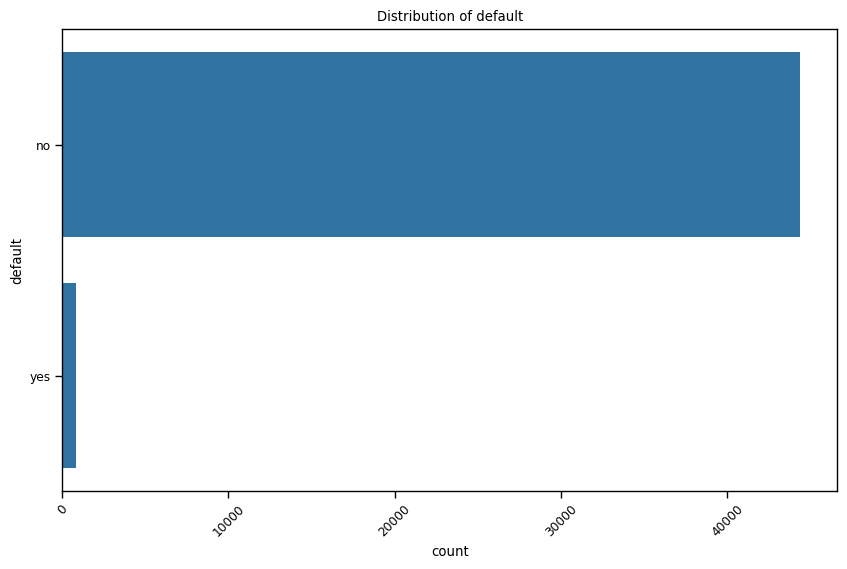

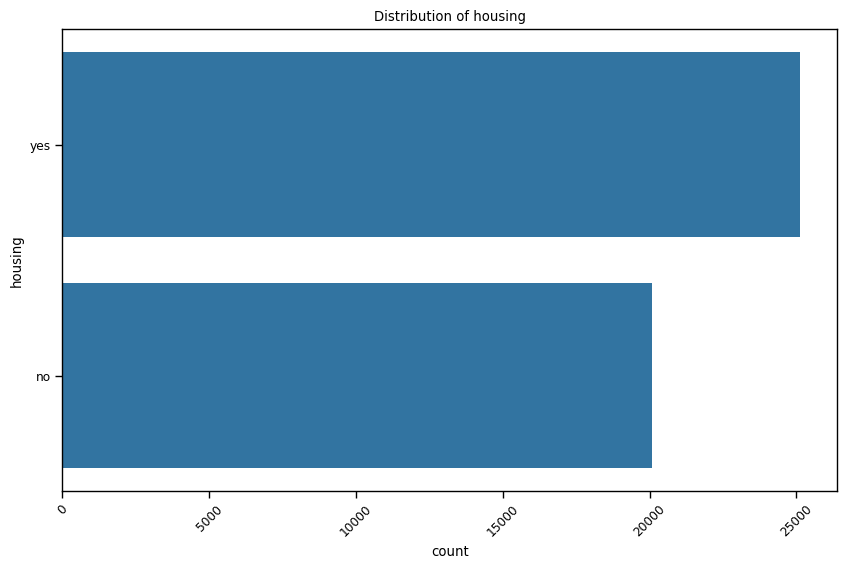

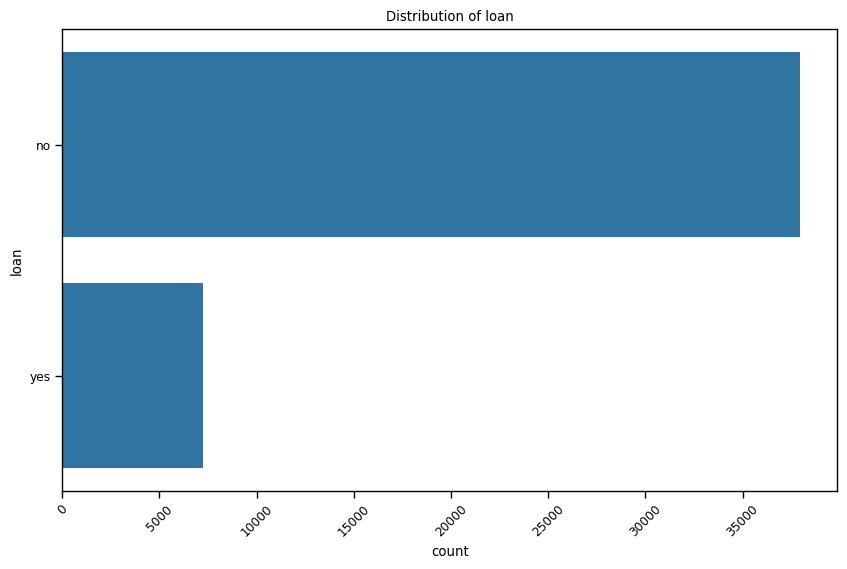

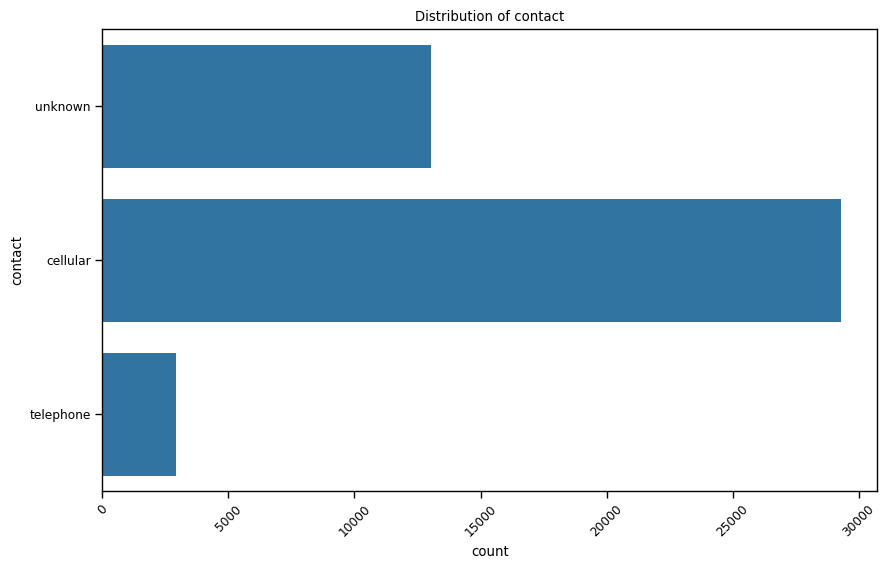

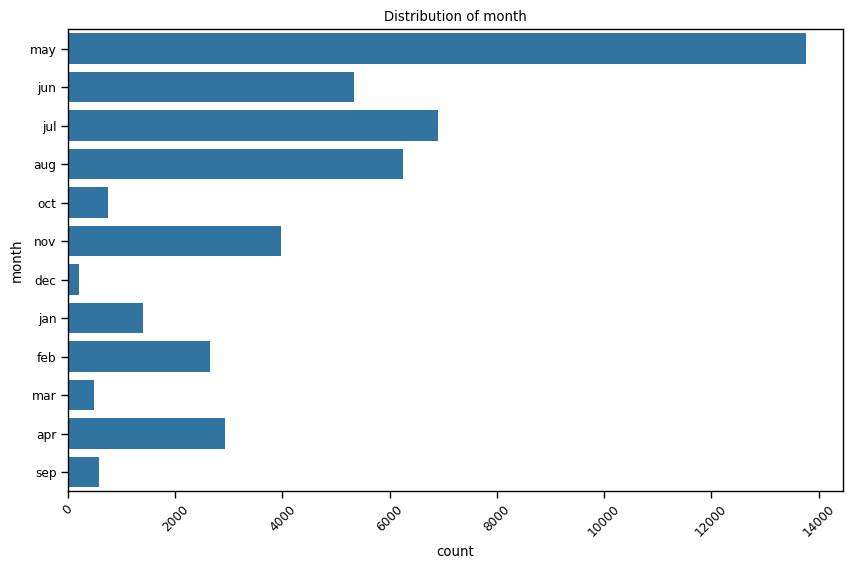

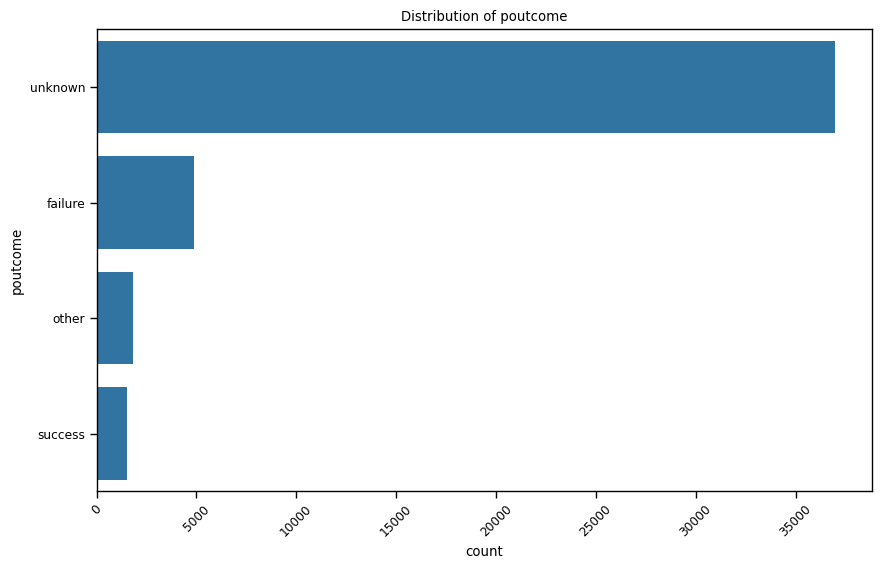

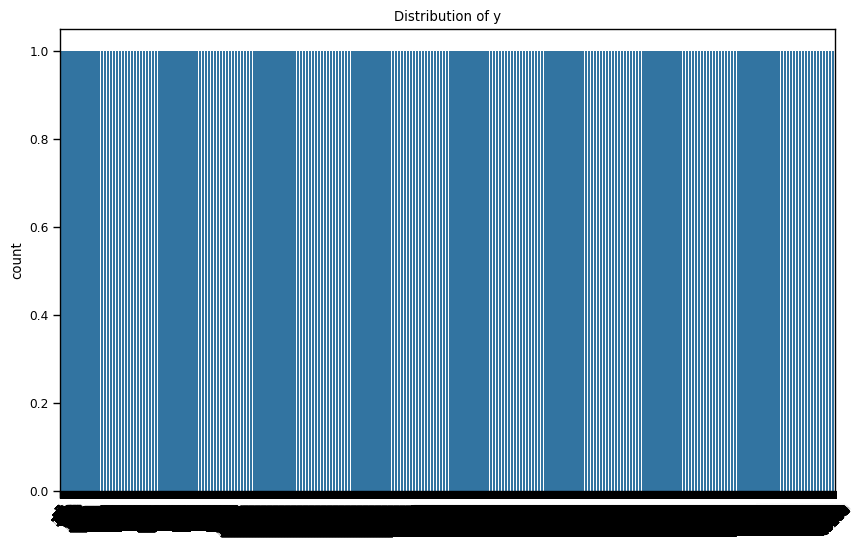

In [74]:
categorical_features = [ 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

Bivariate Analysis

In [52]:
#job vs subscribed
print(pd.crosstab(df1['job'],df1['y']))

y                 0     1
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


In [54]:
job = pd.crosstab(df1['job'],df1['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

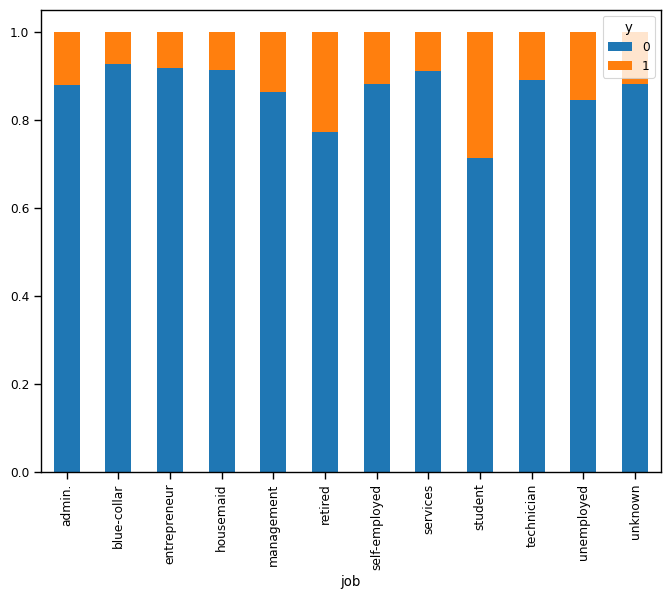

In [55]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [56]:
#Marital status vs subscribed
pd.crosstab(df1['marital'], df1['y'])

y,0,1
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [57]:
marital = pd.crosstab(df['marital'], df['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,0,1
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


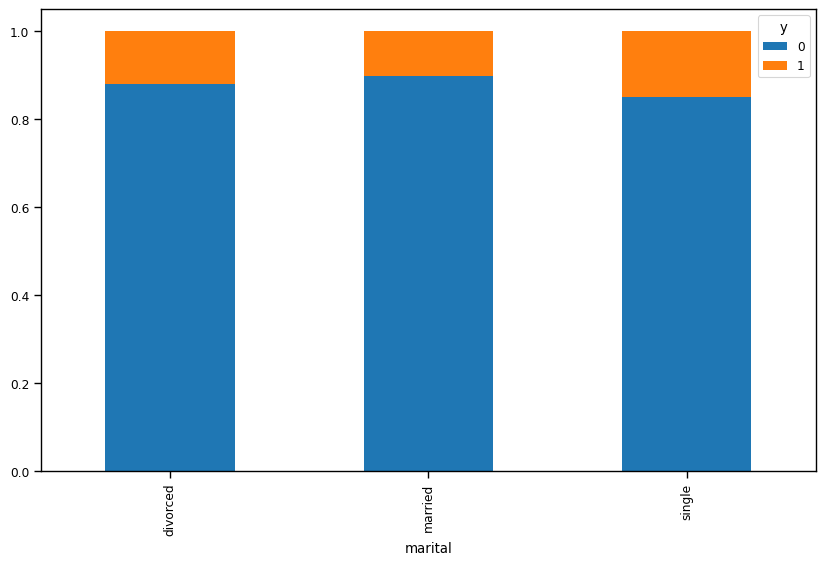

In [58]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [60]:
#default vs subscription
pd.crosstab(df1['default'], df1['y'])

y,0,1
default,,
no,39159,5237
yes,763,52


In [62]:
dflt = pd.crosstab(df1['default'], df1['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,0,1
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


<Axes: xlabel='default'>

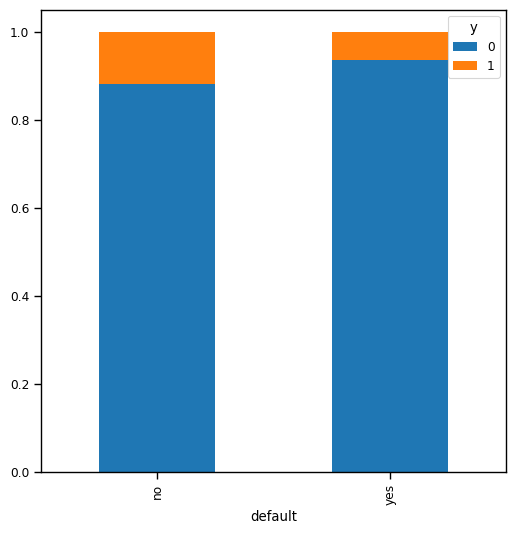

In [63]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [67]:
#Correlation matrix
corr_column=['age','balance','day','duration','campaign','pdays','previous','y']
cor = df1[corr_column].corr()
cor

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: >

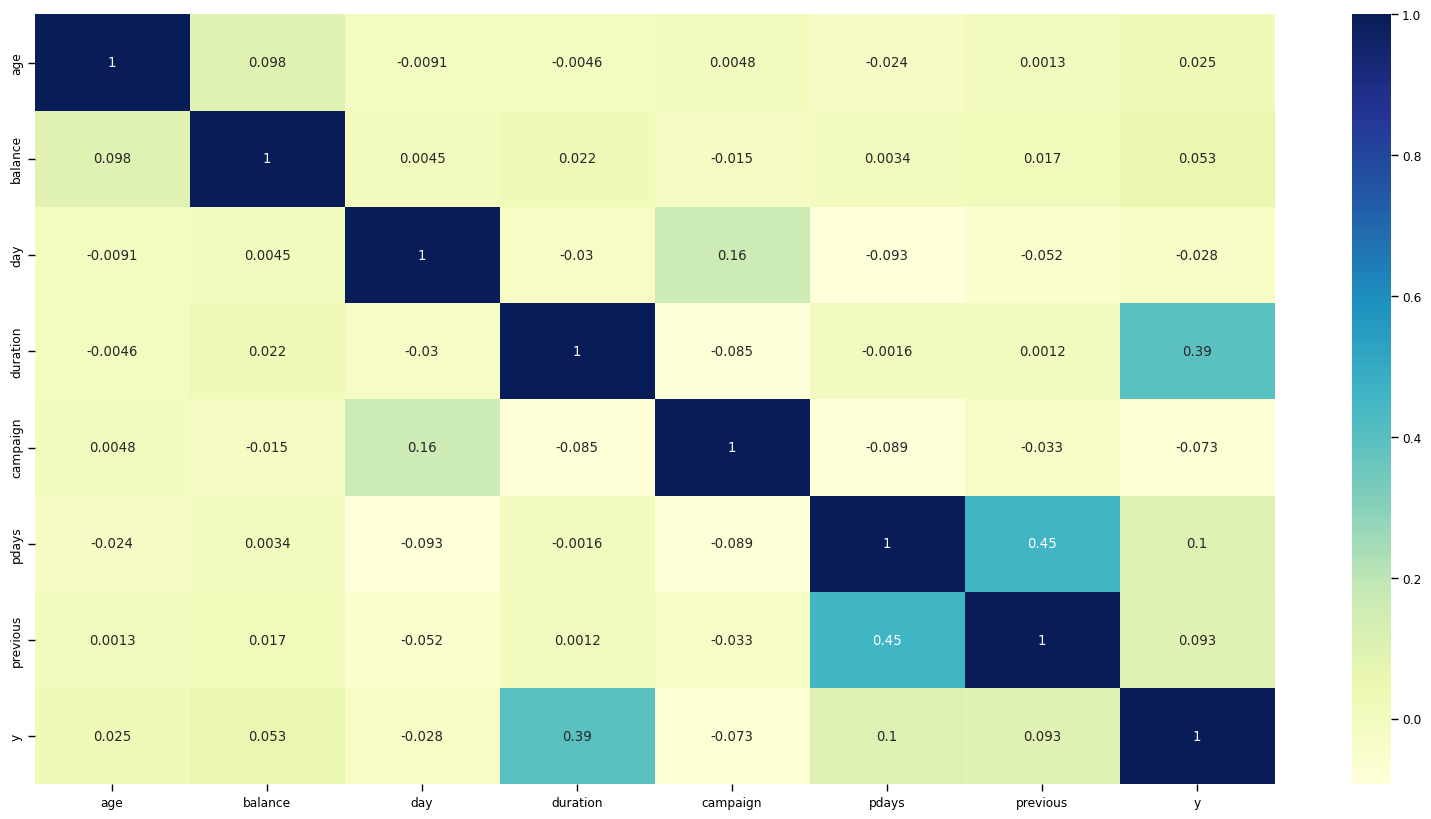

In [68]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, annot=True, cmap='YlGnBu')

The duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Conclustion:


More Job types are Admin, Technician, and blue-collar and it means bank targeting high salaried people.

    
Most customer were contacted using cellular

Most of the clients fall in the age group between 20-60.

12% of the total client subscribed to term deposit

most of the clients belonged to blue-collar job and students are least in general as they don't make term deposits in general.

clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.
